# Mean-Variance Portfolio Optimization 

This is a strategy aimed at maximizing the rewards for a given level of risk in portfolio allocation. The principle is to balance risk and reward - to strive for the highest possible return without accepting an inefficient amount of risk relative to the market. This approach aids in determining the optimal portfolio allocation, focusing on gaining the highest returns for the lowest risk. It's all about identifying the sweet spot on the Efficient Frontier - the place where risk and return balance each other out for peak portfolio efficiency.

In [ ]:
%pip install yfinance

In [ ]:
%pip install nbformat

In [3]:
# Cool data
import yfinance as yf

# The usual suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [4]:
# Create a portfolio
symbols = [
    'AAPL',
    'MSFT',
    'META',
    'AMZN',
    'XOM',
    'UNH',
    'JNJ',
    'V',
    'HD',
    'ABBV',
    'KO',
    'DIS',
    'T',
    'UPS',
    'LMT',
    'CAT',
    'F',
    'MAR',
    'O',
    'HSY'
]

In [5]:
# Get stock data
data = yf.download(symbols, start='2018-01-01', end='2023-07-25')
data.head()

[*********************100%***********************]  20 of 20 completed


Adj Close                                                \
                 AAPL       ABBV       AMZN         CAT         DIS   
Date                                                                  
2018-01-02  40.831581  75.740997  59.450500  136.692123  108.726051   
2018-01-03  40.824482  76.926247  60.209999  136.900970  109.192848   
2018-01-04  41.014103  76.487556  60.479500  138.781113  109.144241   
2018-01-05  41.481056  77.819061  61.457001  140.974609  108.551003   
2018-01-08  41.326992  76.572220  62.343498  144.517242  106.994987   

                                                                      ...  \
                    F          HD         HSY         JNJ         KO  ...   
Date                                                                  ...   
2018-01-02   9.644667  164.704376   99.656090  120.209480  38.256847  ...   
2018-01-03   9.720848  165.562805   99.238289  121.357758  38.172836  ...   
2018-01-04   9.888449  166.876740   99.931633  121.349129  38.710484  ...   
2018-01-05  10.056048  168.619873  100.411659  122.350662  38.702084  ...   
2018-01-08  10.017961  168.216904  101.389458  122.506104  38.643276  ...   

             Volume                                                           \
                LMT      MAR      META      MSFT        O         T      UNH   
Date                                                                           
2018-01-02  1189600  2949200  18151900  22483800  1672872  42626974  3485000   
2018-01-03   893400  1507900  16886600  26061400  1593408  51851150  2417600   
2018-01-04  1443000  3187000  13880900  21912000  1939334  36894187  2749100   
2018-01-05  1241100  3404400  13574500  23407100  1471219  29386048  2432800   
2018-01-08  1084500  3275500  17994700  22113000  1133342  35276524  2850800   

                                        
                UPS        V       XOM  
Date                                    
2018-01-02  5413000  6080900  11469300  
2018-01-03  5655600  6946100  13957700  
2018-01-04  5473100  7805300  10863000  
2018-01-05  3699200  8590500  11047600  
2018-01-08  3243000  6660700  10927100  

[5 rows x 120 columns]

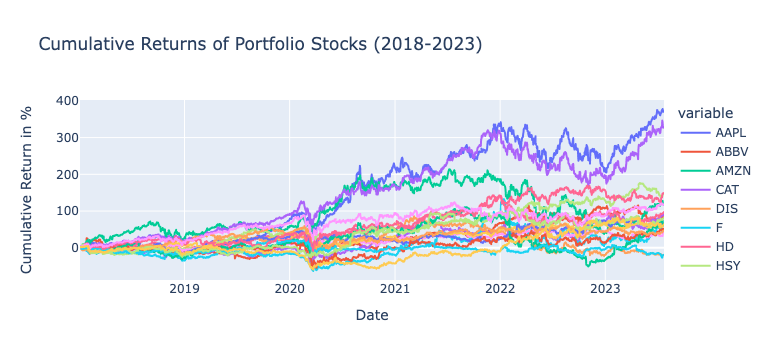

In [7]:
# Visualize cumulative returns of each stock in the portfolio
portfolio_returns = data['Adj Close'].pct_change().dropna()

port_comps_rets_cumprod = portfolio_returns.add(1).cumprod().sub(1)*100

fig = px.line(port_comps_rets_cumprod,
              x=port_comps_rets_cumprod.index,
              y=port_comps_rets_cumprod.columns,
              title='Cumulative Returns of Portfolio Stocks (2018-2023)')

fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()

In [8]:
# Import S & P 500 data and plot cumulative returns for performance comparison
sp_index = yf.download('^GSPC', start='2018-01-01', end='2023-07-25')
sp_index.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3397430000
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3544030000
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3697340000
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3239280000
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3246160000


<Axes: >

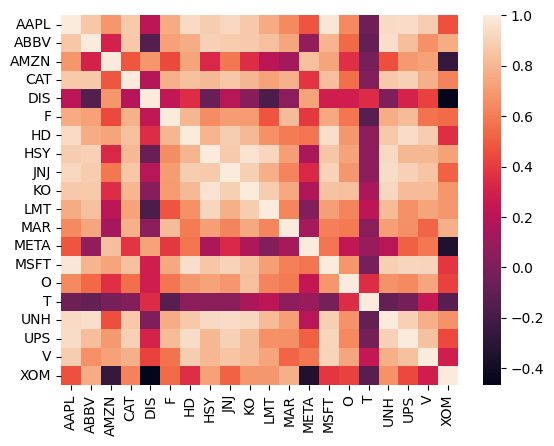

In [10]:
# Create a correlation heatmap to visualize portfolio asset neutrality
port_corr = port_comps_rets_cumprod.corr()

sns.heatmap(port_corr)

## Optimization

In [ ]:
%pip install PyPortfolioOpt

In [12]:
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.expected_returns import ema_historical_return
from pypfopt.risk_models import exp_cov
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.plotting import plot_efficient_frontier
from pypfopt.plotting import plot_weights
from pypfopt.cla import CLA

In [14]:
# Partition data into train and test
train = portfolio_returns[:'2021-05-30']
test = portfolio_returns['2021-05-31':]

# Exponential moving average
mu = expected_returns.ema_historical_return(train, returns_data=True, span=500)

# Exponential covariant
Sigma = risk_models.exp_cov(train, returns_data=True, span=500)

In [15]:
mu

AAPL    0.482579
ABBV    0.310709
AMZN    0.325962
CAT     0.631791
DIS     0.348453
F       0.840881
HD      0.362709
HSY     0.290996
JNJ     0.204723
KO      0.168178
LMT     0.132250
MAR     0.337955
META    0.500465
MSFT    0.442765
O       0.219010
T       0.064655
UNH     0.442568
UPS     0.679428
V       0.264695
XOM     0.283278
Name: 2021-05-28 00:00:00, dtype: float64

In [21]:
mu_max = mu.max()

ret_ef = np.arange(0, mu_max, 0.01)
vol_ef = []

for i in np.arange(0, mu_max, 0.01):
    ef = EfficientFrontier(mu, Sigma)
    ef.efficient_return(i)
    vol_ef.append(ef.portfolio_performance()[1])

In [22]:
ef = EfficientFrontier(mu, Sigma)
ef.min_volatility()
min_vol_ret = ef.portfolio_performance()[0]
min_vol_vol = ef.portfolio_performance()[1]

In [23]:
ef = EfficientFrontier(mu, Sigma)
ef.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef.portfolio_performance()[0]
max_sharpe_vol = ef.portfolio_performance()[1]

/Users/ryanzola/Documents/Web/python/simple_moving_average/simple_moving_average_env/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning:

The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.



Text(0.5, 1.0, 'Efficeint Frontier')

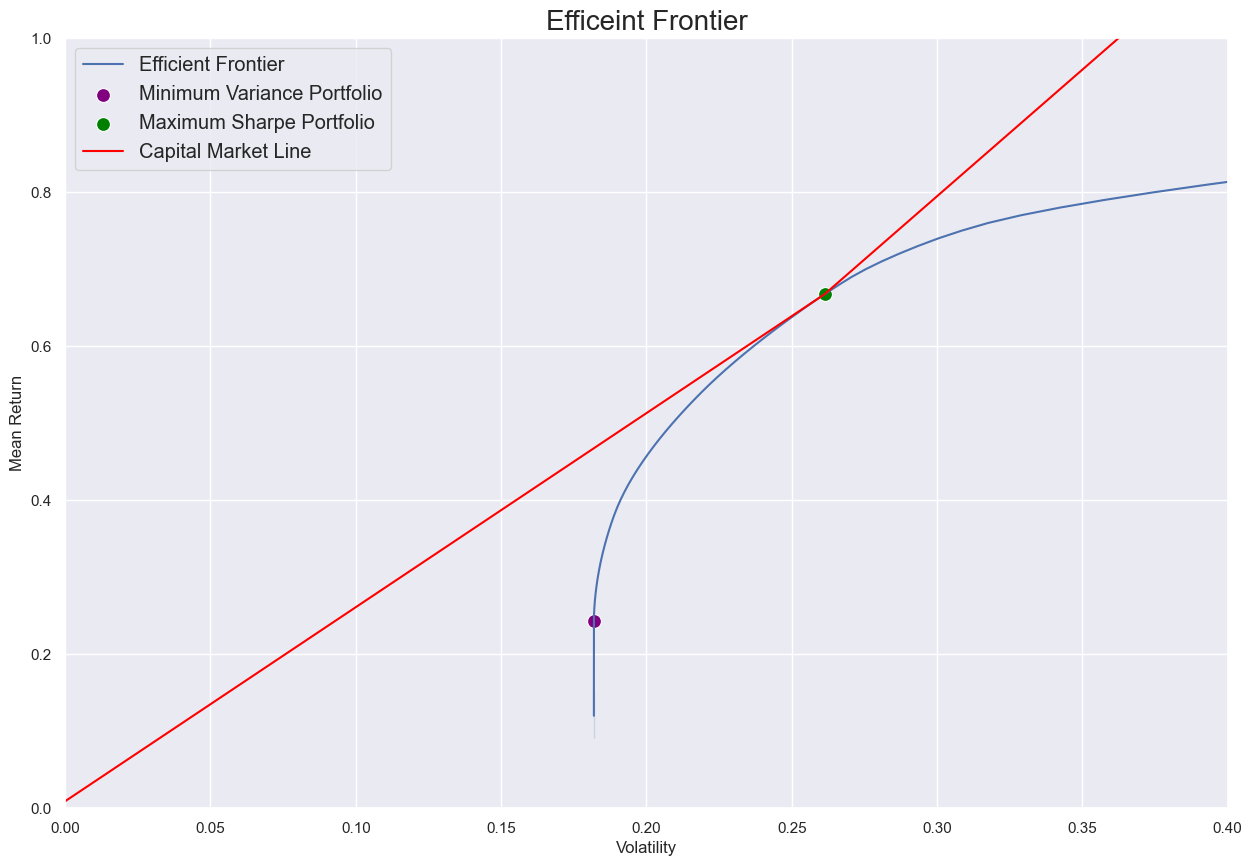

In [27]:
sns.set()

fix, ax = plt.subplots(figsize = [15, 10])

# Plot Efficient Frontier
sns.lineplot(x = vol_ef, y = ret_ef,
             label = 'Efficient Frontier',
             ax = ax)

# Plot portfolio with minimum variance
sns.scatterplot(x = [min_vol_vol], y=[min_vol_ret],
                ax = ax,
                label = 'Minimum Variance Portfolio',
                color = 'purple', s = 100)

# Plot maximum sharpe portfolio
sns.scatterplot(x = [max_sharpe_vol], y = [max_sharpe_ret],
                ax = ax,
                label = 'Maximum Sharpe Portfolio',
                color = 'green', s = 100)

sns.lineplot(x = [0, max_sharpe_vol, 1], 
             y = [0.009, max_sharpe_ret, 3.096],
             ax = ax,
             label = 'Capital Market Line',
             color = 'red')

ax.set(xlim = [0, 0.4])
ax.set(ylim = [0, 1])
ax.set_xlabel('Volatility')
ax.set_ylabel('Mean Return')
plt.legend(fontsize='large')
plt.title('Efficeint Frontier', fontsize='20')

Essentially, just trying to pick a portfolio that stays on this efficient frontier so that no matter how much volatility that we're taking on, algorithmically, we should be getting average returns that are efficient to the market capital for the chosen stocks.

Expected annual return: 24.3%
Annual volatility: 18.2%
Sharpe Ratio: 1.29


(0.24308258745068922, 0.18193585484987249, 1.2866215273720867)

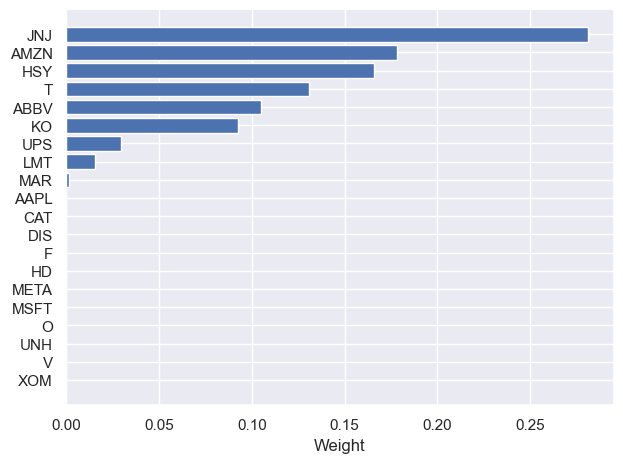

In [28]:
# Minimum Variance: Less volatility
ef = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp = ef.min_volatility()

plot_weights(raw_weights_minvar_exp)
ef.portfolio_performance(verbose=True, risk_free_rate=0.009)

Expected annual return: 66.8%
Annual volatility: 26.1%
Sharpe Ratio: 2.52


(0.6675191055900265, 0.2613303738679643, 2.5198720525412)

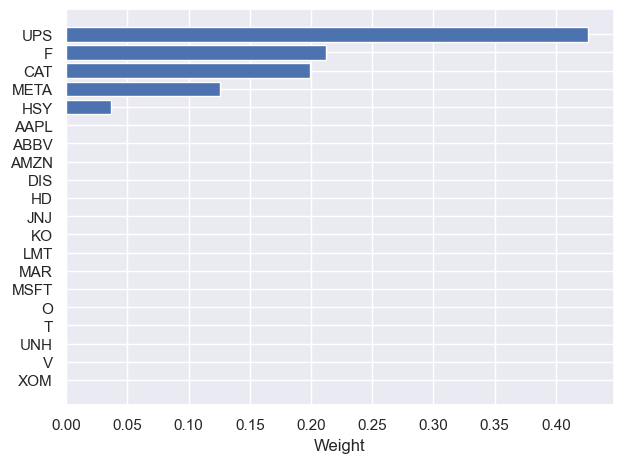

In [29]:
# Maximum Sharpe: Taking on more volatility for more rewards
ef = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef.max_sharpe(risk_free_rate=0.009)

plot_weights(raw_weights_maxsharpe_exp)
ef.portfolio_performance(verbose=True, risk_free_rate=0.009)

## Backtesting

In [30]:
weights_minvar_exp = list(raw_weights_minvar_exp.values())
weights_maxsharpe_exp = list(raw_weights_maxsharpe_exp.values())

ret_1 = test.dot(weights_minvar_exp).add(1).cumprod().subtract(1).multiply(100)
ret_2 = test.dot(weights_maxsharpe_exp).add(1).cumprod().subtract(1).multiply(100)

ind_ret = sp_index['2021-05-31':]['Adj Close'].pct_change().add(1).cumprod().subtract(1).multiply(100)

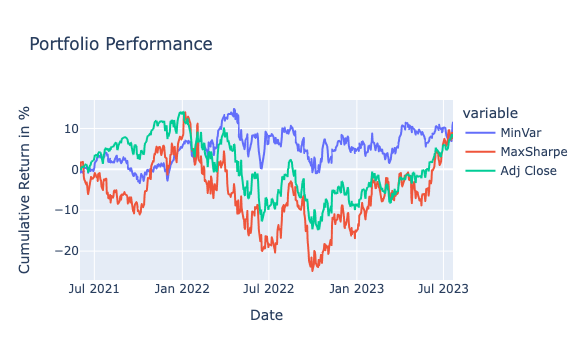

In [31]:
back = pd.DataFrame({'MinVar':ret_1, 'MaxSharpe':ret_2})
back = pd.concat([back, ind_ret], join='outer', axis=1)
back.drop(back.tail(1).index, inplace=True)

back.interpolate(method='linear', inplace=True)

fig = px.line(back, x=back.index, y=back.columns, title='Portfolio Performance')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()